# Modelos de Regressão: Parte 02

* O problema de negócio:

Queremos verificar o problema de predição da taxa média de ocupação de casas de Boston. O target será a taxa de ocupação de casas.

In [222]:
import pandas as pd
df = pd.read_csv('data/case01/boston_house_prices.csv') 
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2


* Análise Exploratória dos Dados:

Como informação fundamental, a variável objetivo é `MEDV`. Precisamos também verificar se temos variáveis categóricas, para isso precisamos conhecer o nosso conjunto de dados.

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CRIM     506 non-null    object
 1   ZN       506 non-null    object
 2   INDUS    506 non-null    object
 3   CHAS     506 non-null    object
 4   NOX      506 non-null    object
 5   RM       506 non-null    object
 6   AGE      506 non-null    object
 7   DIS      506 non-null    object
 8   RAD      506 non-null    object
 9   TAX      506 non-null    object
 10  PTRATIO  506 non-null    object
 11  B        506 non-null    object
 12  LSTAT    506 non-null    object
 13  MEDV     506 non-null    object
dtypes: object(14)
memory usage: 55.5+ KB


In [224]:
# Todas as variáveis estão apresentadas como object, precisamos mudar isso.
df = df.apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [225]:
# Agora podemos executar operações numéricas
vmean_target = df['MEDV'].mean()
vmean_target

22.532806324110677

In [226]:
# Temos agora a média da variável objetivo e espera-se que os resultados
# do modelo de predição apresente valores em torno dessa média pois de 
# acordo com o teorema do limite central, à medida em que aumentamos o 
# tamanho de uma amosta, a distribuição amostral tende a ser uma normal.

# Considerando que o valor predito é a média
import numpy as np
SE = pd.Series(vmean_target - df['MEDV'])**2
SSE = np.sum(SE)
print(f'A Soma dos Quadrados dos Erros (SSE) é {SSE:.2f} %')

A Soma dos Quadrados dos Erros (SSE) é 42716.30 %


$$ SSE = \sum _{i}^{n} (y^{mean}-y)^2$$

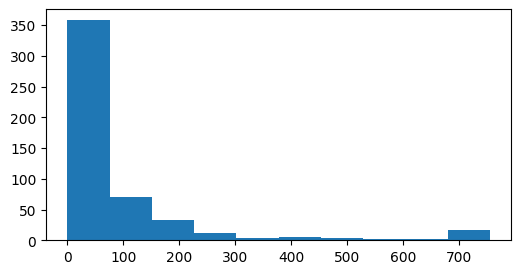

In [227]:
# Verificando um histograma
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
plt.hist(SE)
plt.show()

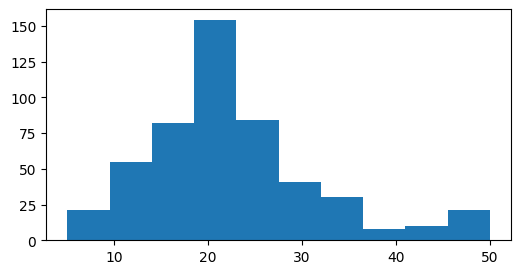

In [228]:
# Do resultado acima temos que em geral os erros são pequenos, podemos
# concluir então que os dados estão distribuidos em torno da média e 
# possivelmente temos uma distribuição normal

plt.figure(figsize=(6,3))
plt.hist(df.MEDV)
plt.show()

In [229]:
# De fato os resultados estão acumulados na média!
# É esperado que exista uma relação entre o numero médio de quartos (RM)
# e a variável objetivo.
# Verificaremos a variável RM:

def desv_pad(variable, bias = 0):
    n = float(len(variable))
    return np.sqrt(np.sum((variable-np.mean(variable))**2) / (n-min(bias,1)))

In [230]:
desv_pad(df['RM']), np.std(df['RM'])

(0.7019225143345689, 0.7019225143345689)

In [231]:
# Para a estimativa de correlação
def pad_variable(variable):
    return (variable - np.mean(variable))/desv_pad(variable)

def covariance(var1, var2, bias = 0):
    n = len(var1)
    return np.sum((var1 - np.mean(var1))*(var2 - np.mean(var2)))/(n-min(bias,1))
    
# Para determinar a correlação
def correlation(var1,var2,bias = 0):
    return covariance(pad_variable(var1), pad_variable(var2), bias)

In [232]:
correlation(df['RM'], df['MEDV'])

0.6953599470715394

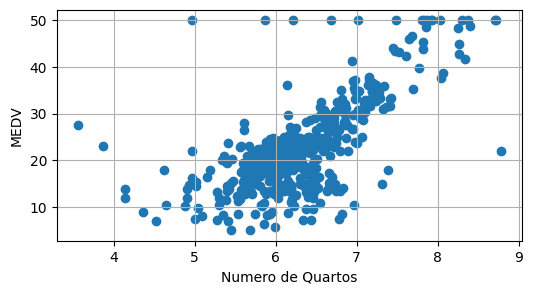

In [233]:
# Concluimos que existe uma correlação razoável entre o numéro de quartos
# e a taxa de ocupação das casas. Podemos verificar graficamente o 
# comportamento das duas variáveis.

plt.figure(figsize=(6,3))
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Numero de Quartos')
plt.ylabel('MEDV')
plt.grid()
plt.show()

Percebemos que de fato existe alguma correlação entre o número de quartos e a taxa de locação das casas de Boston. Tentaremos criar um modelo de regressão linear simples para representar o comportamento da taxa de locação de casas em função do numero de quartos.

In [234]:
import statsmodels.api as st

In [235]:
X = df['RM']
Y = df['MEDV']

X = st.add_constant(X)
X.head()

,const,RM
1,1.0,6.575
2,1.0,6.421
3,1.0,7.185
4,1.0,6.998
5,1.0,7.147


In [236]:
# Para criar um modelo de regressão com statmodels, precisamos criar 
# uma linha de valores constantes acompanhando a varivel preditora.

modelo = st.OLS(Y,X)
modelo01 = modelo.fit()
print(modelo01.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           2.49e-74
Time:                        16:58:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [237]:
# De fato não temos um bom ajuste... (R2 = 0.484). Aparentemente uma reta
# não ajusta tão bem os dados e de fato verificamos isso graficamente uma
# vez que a dispersão dos dados é elevada.

print(modelo01.params)

const   -34.670621
RM        9.102109
dtype: float64


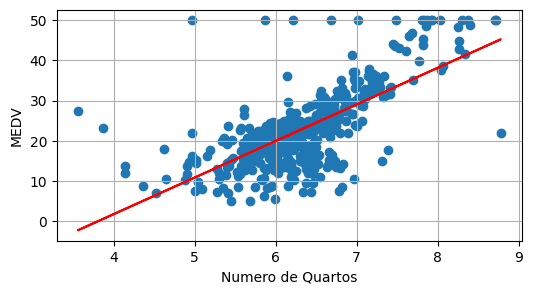

In [238]:
predict01 = modelo01.predict(X)

plt.figure(figsize=(6,3))
plt.scatter(df['RM'], df['MEDV'], label = 'Reais')
plt.plot(df['RM'], predict01,color ='red', label = 'Modelo 01')
plt.xlabel('Numero de Quartos')
plt.ylabel('MEDV')
plt.grid()
plt.show()

In [239]:
# Gerando os resíduos
# Uma abordagem interessante para verificar o comportamento de um modelo
# de regressão é a disposição dos resíduos

residuos = df['MEDV'] - predict01
residuos_normalizados = pad_variable(residuos)

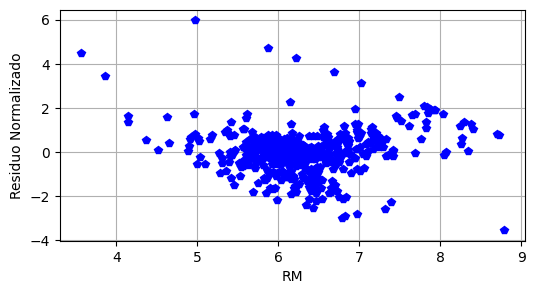

In [240]:
plt.figure(figsize=(6,3))
plt.grid()
plt.plot(df['RM'], residuos_normalizados,'bp')
plt.xlabel('RM')
plt.ylabel('Residuo Normalizado')
plt.show()

In [241]:
# Aplicando scikit-learn para regressão

from sklearn.linear_model import LinearRegression

modelo02 = LinearRegression()

In [242]:
X = df['RM'].values.reshape(len(df),1)
Y = df['MEDV'].values

modelo02.fit(X,Y)

LinearRegression()

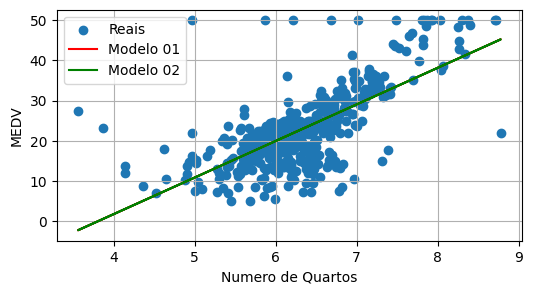

In [243]:
predict02 = modelo02.predict(X)

plt.figure(figsize=(6,3))
plt.scatter(df['RM'], df['MEDV'], label = 'Reais')
plt.plot(df['RM'], predict01,color ='red', label = 'Modelo 01')
plt.plot(df['RM'], predict02,color ='green', label = 'Modelo 02')
plt.xlabel('Numero de Quartos')
plt.ylabel('MEDV')
plt.legend()
plt.grid()
plt.show()

* Cost Function:

Relembrando o modelo em estudo:

$$ y = \beta x + \beta_0 $$

O nosso algoritmo aprende os valores de $\beta_0$ e $\beta$. Para verificar a eficacia da predição, utilizamos as seguintes métricas:

$$ MAE = \sum _{i = 1}^{n} |f(x_i) - y_i| $$
$$ MSE = \sum _{i = 1}^{n} (f(x_i) - y_i)^2 $$
$$ RMSE = \sqrt{\sum _{i = 1}^{n} (f(x_i) - y_i)^2} $$

Existe um motivo para não usarmos a diferença absoluta e sim a diferença quadrada.

1. Quando utilizamos a diferença quadrada como função de custo, o resultado tende a se aproximar da média.
2. Quando utilizamos a diferença absoluta como função de custo, o resultado tende a se aproximar da mediana.

Observação: Sabemos que outliers podem distorcer a média, por esse motivo a presenã de outliers pode incluir imprecisões no problema de otimização visando a minimização da diferença quadrada.

* Problema de regressão minimizando a função de custo:

Podemos escolher a função de custo a ser empregada, para o caso em questão, utilizaremos a segunte função:
$$ \frac{1}{n} \sum _{i = 1}^{n} (h(X) - y)^2 $$

Apresentnado uma pseudo-formula:

$$ w = (X^TX)^{-1}X^Ty $$

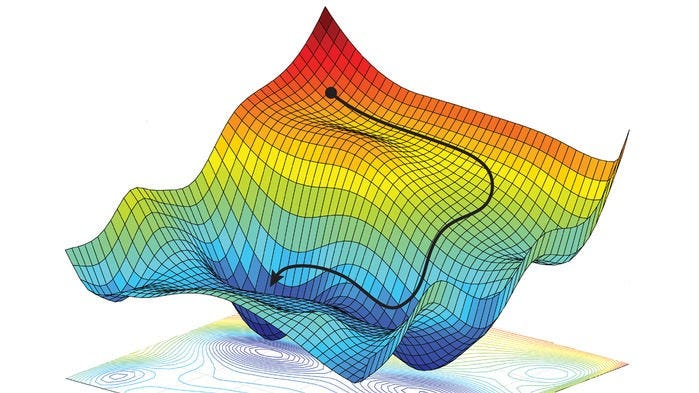

In [244]:
# Aplicando o Gradient Descendente
from IPython.display import Image
Image("imgs/gradiente.jpeg", width=400)

O método busca o ponto de mínimo dando passos curtos verificando o comportamento da derivada para entender se esta seguindo o caminho correto.
1. O gradiente descendente:
$$ J(w) = \frac{1}{2n} \sum (X.w-y)^2 $$

2. Taxa de aprendizagem:
$$ w_j = w_j - \alpha * \frac{\partial}{\partial w} J(w) $$

In [245]:
n = len(df)

X = df['RM'].values.reshape((n,1))
X = np.column_stack((X,np.ones(n)))
Y = df['MEDV'].values

In [246]:
# Criando funções para o processo de otimização
import random

def random_w(p):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,Y):
    return hypothesis(X,w)-Y

def s_loss(X,w,Y):
    return loss(X,w,Y)**2

def gradient(X,w,Y):
    gradients = list()
    n = float(len(Y))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,Y)*X[:,j])/n)
    return gradients

def upp(X,w,Y,alpha = 0.001):
    return [t - alpha*g for t,g in zip(w,gradient(X,w,Y))]

def optmize(X,Y,alpha = 0.01, eta  = 10**-18, iterations = 1000):
    w = random_w(len(X[0]))
    path = list()
    for k in range(iterations):
        SSL = np.sum(s_loss(X,w,Y))
        new_w = upp(X,w,Y, alpha = alpha)
        new_SSL = np.sum(s_loss(X,new_w,Y))
        w = new_w

        if k >= 5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations/20) == 0:
            path.append(new_SSL)
    return w,path

In [247]:
alpha = 0.048

w, path = optmize(X,Y,alpha, eta = 10**-20, iterations = 25000)

In [248]:
print(f'Resultados: {w}')

Resultados: [9.102103355671066, -34.6705849919104]


In [249]:
print(f'Caminmho: {path}')

Caminmho: [328891.81317163975, 23770.463350732294, 22465.376671777234, 22157.168744787396, 22084.382677937472, 22067.193595296983, 22063.134239230516, 22062.175585879493, 22061.949191290696, 22061.895726177598, 22061.883099911513, 22061.880118105506, 22061.87941392527, 22061.879247626788, 22061.87920835391, 22061.879199079267, 22061.87919688898, 22061.879196371723, 22061.879196249567, 22061.87919622072, 22061.879196219787]


Concluimos assim o procedimento manual de otimização para ajuste de parâmetros de um modelo de regressão linear simples.